# House prices fuzzy expert system

## About expert system:<a id='about'></a>
This fuzzy expert system aims to predict the price of houses by Mamdani inferance, depending on their sqft_living ,grade , bedrooms , bathrooms ,sqft_above and sqft_basement.

## contents

- [About model](#about)
- [Import libraries](#lib)
- [Collecting (Gathering) data](#data)
- [Explore data analysis (EDA)](#eda)
>- [Statistical](#sta)
>- [Visualization](#vis)
- [Prepare and manipulate Data](#prepare)
- [Mamdani inferance](#mam)
>- [1.fuzzification](#st1)
>- [2.Rule evaluation](#st2)
>- [3.Aggregations of the rule outputs](#st3)
>- [4.Defuzzification](#st4)
<a id='mmmmmm'></a>

## Import libraries<a id='lib'></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

## Collecting (Gathering) data<a id='data'></a>

In [2]:
df = pd.read_csv('houses.csv')

In [3]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

## Explore data analysis (EDA)<a id='eda'></a>

### 1. Statistical<a id='sta'></a>

In [5]:
df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
bedrooms,1.000000,0.482798,0.559241,0.080920,0.185199,-0.050026,0.032564,0.056094,0.380440,0.473182,0.272198,0.130048,0.045829,-0.188933,-0.002473,0.117745,0.405484,0.306886
bathrooms,0.482798,1.000000,0.722383,0.151901,0.465510,0.064334,0.149843,-0.079503,0.664543,0.655316,0.274319,0.501625,0.034624,-0.259597,0.043276,0.272425,0.617032,0.487360
sqft_living,0.559241,0.722383,1.000000,0.228735,0.351308,0.101884,0.295227,0.006140,0.776031,0.861978,0.458924,0.294729,0.051350,-0.228496,0.128400,0.227880,0.807157,0.704948
sqft_lot,0.080920,0.151901,0.228735,1.000000,-0.010792,0.039220,0.055195,-0.023364,0.138684,0.250410,0.011653,0.118462,-0.017932,-0.134003,0.012487,0.286567,0.273712,0.146680
floors,0.185199,0.465510,0.351308,-0.010792,1.000000,-0.012500,-0.013728,-0.201886,0.422261,0.550499,-0.272861,0.398802,0.031372,-0.047269,0.086412,0.162511,0.289369,0.239497
waterfront,-0.050026,0.064334,0.101884,0.039220,-0.012500,1.000000,0.397841,0.053522,0.078947,0.058085,0.098874,-0.013246,0.037573,0.027472,-0.026438,-0.061491,0.112337,0.317311
view,0.032564,0.149843,0.295227,0.055195,-0.013728,0.397841,1.000000,0.089078,0.235101,0.144443,0.328337,-0.039324,0.041248,0.045996,0.031193,-0.094165,0.317280,0.445190
condition,0.056094,-0.079503,0.006140,-0.023364,-0.201886,0.053522,0.089078,1.000000,-0.061347,-0.086372,0.163470,-0.317137,-0.074066,0.030537,-0.060439,-0.158939,-0.046798,0.073413
grade,0.380440,0.664543,0.776031,0.138684,0.422261,0.078947,0.235101,-0.061347,1.000000,0.754809,0.205613,0.431182,0.001580,-0.207707,0.140159,0.215286,0.744724,0.647845
sqft_above,0.473182,0.655316,0.861978,0.250410,0.550499,0.058085,0.144443,-0.086372,0.754809,1.000000,-0.054825,0.390261,0.024989,-0.253745,0.059706,0.340541,0.763250,0.582805


In [6]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,2051.397397,14707.242242,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,98074.441441,47.549720,-122.207406,1986.813814,52.071452
std,0.852367,0.721983,888.351113,28975.077254,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,52.545832,0.141558,0.139564,670.723475,33.974907
min,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.490000,830.000000,8.000000
25%,3.000000,1.500000,1405.000000,5419.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.443000,-122.322500,1490.000000,30.980000
50%,3.000000,2.000000,1900.000000,8040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98058.000000,47.563600,-122.218000,1850.000000,43.500000
75%,4.000000,2.500000,2475.000000,11508.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,98116.000000,47.673400,-122.118000,2360.000000,63.446250
max,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,98199.000000,47.777600,-121.709000,4760.000000,308.000000


### 2. Visualization<a id='vis'></a>

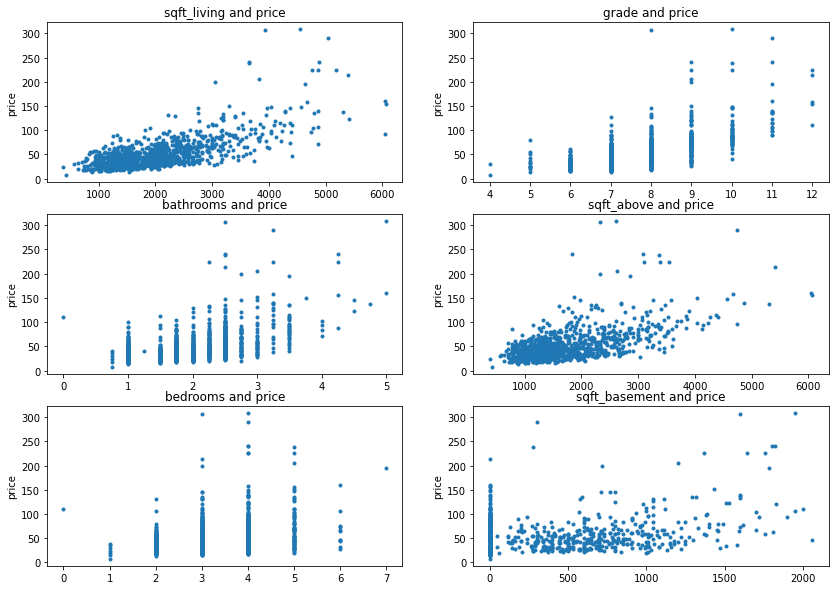

In [7]:
fig, axs = plt.subplots(3, 2,figsize=(14,10))
axs[0, 0].plot(df["sqft_living"],df["price"],'.');
axs[0, 0].set_title("sqft_living and price")
axs[0, 1].plot(df["grade"],df["price"],'.');
axs[0, 1].set_title("grade and price")
axs[2, 0].plot(df["bedrooms"],df["price"],'.');
axs[2, 0].set_title('bedrooms and price')
axs[1, 0].plot(df["bathrooms"],df["price"],'.');
axs[1, 0].set_title('bathrooms and price')
axs[1, 1].plot(df["sqft_above"],df["price"],'.');
axs[1, 1].set_title('sqft_above and price')
axs[2, 1].plot(df["sqft_basement"],df["price"],'.');
axs[2, 1].set_title('sqft_basement and price')

for ax in axs.flat:
    ax.set( ylabel='price')


## Prepare and manipulate Data<a id='prepare'></a>

In [8]:
df = df[df.floors == 1]
df = df[df.waterfront == 0]
df = df[df.view == 0]
df = df[df.yr_renovated == 0]
df = df[df.condition == 3]
df = df[df.sqft_basement != 0]

In [9]:
df["bathrooms"]=df["bathrooms"].round()
df["sqft_living"]=df["sqft_living"].round()
df["sqft_basement"]=df["sqft_basement"].round()
df["sqft_above"]=df["sqft_above"].round()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 5 to 986
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       109 non-null    float64
 1   bathrooms      109 non-null    float64
 2   sqft_living    109 non-null    float64
 3   sqft_lot       109 non-null    float64
 4   floors         109 non-null    float64
 5   waterfront     109 non-null    float64
 6   view           109 non-null    float64
 7   condition      109 non-null    float64
 8   grade          109 non-null    float64
 9   sqft_above     109 non-null    float64
 10  sqft_basement  109 non-null    float64
 11  yr_built       109 non-null    float64
 12  yr_renovated   109 non-null    float64
 13  zipcode        109 non-null    float64
 14  lat            109 non-null    float64
 15  long           109 non-null    float64
 16  sqft_living15  109 non-null    float64
 17  price          109 non-null    float64
dtypes: float64

In [11]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
count,109.000000,109.000000,109.000000,109.000000,109.0,109.0,109.0,109.0,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,109.000000
mean,3.440367,2.018349,1979.174312,16251.880734,1.0,0.0,0.0,3.0,7.266055,1285.688073,693.486239,1967.596330,0.0,98076.238532,47.583475,-122.228807,1874.036697,45.158496
std,0.821372,0.544019,682.594287,37306.900544,0.0,0.0,0.0,0.0,0.702406,420.395244,346.958014,22.348717,0.0,54.612422,0.143200,0.116083,562.914241,19.531777
min,2.000000,1.000000,800.000000,2500.000000,1.0,0.0,0.0,3.0,6.000000,670.000000,120.000000,1900.000000,0.0,98001.000000,47.194900,-122.396000,950.000000,22.000000
25%,3.000000,2.000000,1560.000000,6460.000000,1.0,0.0,0.0,3.0,7.000000,1060.000000,450.000000,1956.000000,0.0,98033.000000,47.488800,-122.317000,1570.000000,32.250000
50%,3.000000,2.000000,1820.000000,7750.000000,1.0,0.0,0.0,3.0,7.000000,1230.000000,630.000000,1975.000000,0.0,98058.000000,47.620900,-122.224000,1770.000000,41.490000
75%,4.000000,2.000000,2230.000000,10026.000000,1.0,0.0,0.0,3.0,7.000000,1410.000000,900.000000,1981.000000,0.0,98118.000000,47.700400,-122.153000,2090.000000,51.500000
max,6.000000,4.000000,5420.000000,262018.000000,1.0,0.0,0.0,3.0,11.000000,3890.000000,1810.000000,2013.000000,0.0,98199.000000,47.773800,-121.845000,4760.000000,133.000000


In [12]:
df2=df.loc[:,["sqft_living","grade","bedrooms","bathrooms","sqft_above","sqft_basement","price"]]

In [13]:
df2=df2.reset_index()

In [14]:
df2.head(10)

,index,sqft_living,grade,bedrooms,bathrooms,sqft_above,sqft_basement,price
0,5,5420.0,11.0,4.0,4.0,3890.0,1530.0,123.00
1,8,1780.0,7.0,3.0,1.0,1050.0,730.0,22.95
2,10,3560.0,8.0,3.0,2.0,1860.0,1700.0,66.25
3,28,1520.0,7.0,3.0,2.0,790.0,730.0,43.80
4,34,2060.0,7.0,4.0,3.0,1280.0,780.0,32.25
5,41,4220.0,8.0,4.0,2.0,2600.0,1620.0,77.50
6,53,1980.0,7.0,2.0,2.0,990.0,990.0,58.50
7,64,1660.0,7.0,3.0,2.0,1110.0,550.0,42.50
8,69,3200.0,8.0,5.0,2.0,1600.0,1600.0,133.00
9,76,1760.0,7.0,4.0,2.0,880.0,880.0,38.00


In [15]:
df2=df2.drop(labels="index",axis=1)

In [16]:
df2.corr()

,sqft_living,grade,bedrooms,bathrooms,sqft_above,sqft_basement,price
sqft_living,1.000000,0.713362,0.451922,0.491748,0.910037,0.864713,0.581968
grade,0.713362,1.000000,0.180220,0.399036,0.749270,0.495585,0.526442
bedrooms,0.451922,0.180220,1.000000,0.458346,0.366749,0.444722,0.147930
bathrooms,0.491748,0.399036,0.458346,1.000000,0.502375,0.358742,0.115943
sqft_above,0.910037,0.749270,0.366749,0.502375,1.000000,0.578718,0.603631
sqft_basement,0.864713,0.495585,0.444722,0.358742,0.578718,1.000000,0.413549
price,0.581968,0.526442,0.147930,0.115943,0.603631,0.413549,1.000000


In [17]:
df2.describe()

,sqft_living,grade,bedrooms,bathrooms,sqft_above,sqft_basement,price
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1979.174312,7.266055,3.440367,2.018349,1285.688073,693.486239,45.158496
std,682.594287,0.702406,0.821372,0.544019,420.395244,346.958014,19.531777
min,800.000000,6.000000,2.000000,1.000000,670.000000,120.000000,22.000000
25%,1560.000000,7.000000,3.000000,2.000000,1060.000000,450.000000,32.250000
50%,1820.000000,7.000000,3.000000,2.000000,1230.000000,630.000000,41.490000
75%,2230.000000,7.000000,4.000000,2.000000,1410.000000,900.000000,51.500000
max,5420.000000,11.000000,6.000000,4.000000,3890.000000,1810.000000,133.000000


## Mamdani inferance<a id='mam'></a>

### 1. Fuzzification <a id='st1'></a>

In [18]:
sqft_living = ctrl.Antecedent(np.arange(800,5421, 1), 'sqft_living')
grade = ctrl.Antecedent(np.arange(6, 12, 1), 'grade')
bedrooms = ctrl.Antecedent(np.arange(2, 7, 1), 'bedrooms')
bathrooms = ctrl.Antecedent(np.arange(1, 5, 1), 'bathrooms')
sqft_above = ctrl.Antecedent(np.arange(670, 3891, 1), 'sqft_above')
sqft_basement = ctrl.Antecedent(np.arange(120, 1811, 1), 'sqft_basement')

In [19]:
price = ctrl.Consequent(np.arange(22, 133.5, 0.5), 'price')

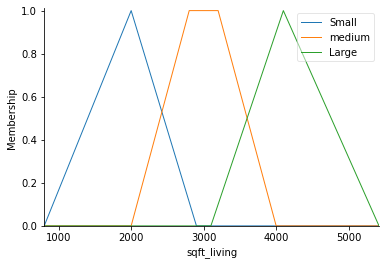

In [20]:
sqft_living['Small'] = fuzz.trapmf(sqft_living.universe, [800, 2000, 2000,2900])
sqft_living['medium'] = fuzz.trapmf(sqft_living.universe, [2000, 2800, 3200,4000])
sqft_living['Large'] = fuzz.trapmf(sqft_living.universe, [3100, 4100, 4100,5420])
sqft_living.view()

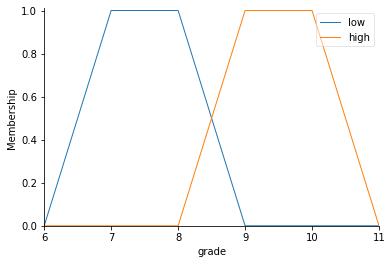

In [21]:
grade['low'] = fuzz.trapmf(grade.universe, [6, 7, 8,9])
grade['high'] = fuzz.trapmf(grade.universe, [8, 9, 10,11])
grade.view()

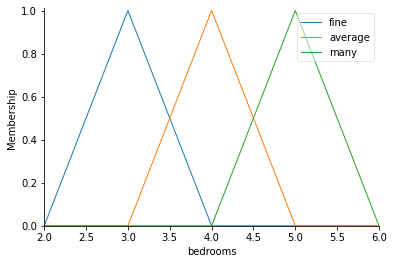

In [22]:
bedrooms['fine'] = fuzz.trapmf(bedrooms.universe, [2, 3, 3,4])
bedrooms['average'] = fuzz.trapmf(bedrooms.universe, [3, 4, 4,5])
bedrooms['many'] = fuzz.trapmf(bedrooms.universe, [4, 5, 5,6])
bedrooms.view()

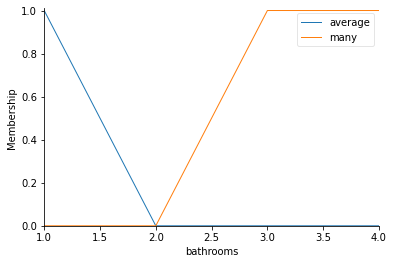

In [23]:
bathrooms['average'] = fuzz.trapmf(bathrooms.universe, [1, 1, 1,2])
bathrooms['many'] = fuzz.trapmf(bathrooms.universe, [3, 3, 4,4])
bathrooms.view()

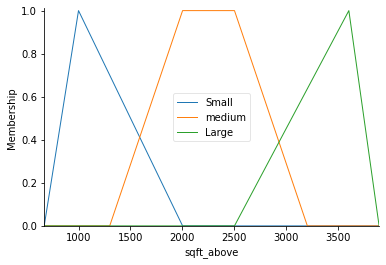

In [24]:
sqft_above['Small'] = fuzz.trapmf(sqft_above.universe, [670,1000 , 1000,2000])
sqft_above['medium'] = fuzz.trapmf(sqft_above.universe, [1300, 2000, 2500,3200])
sqft_above['Large'] = fuzz.trapmf(sqft_above.universe, [2500, 3600, 3600,3891])
sqft_above.view()

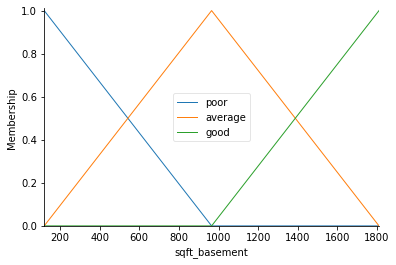

In [25]:
sqft_basement.automf(3)
sqft_basement.view()

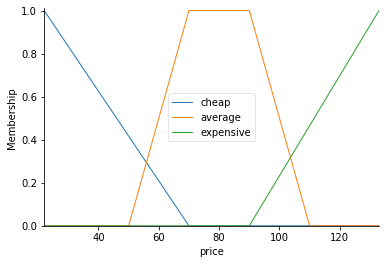

In [26]:
price['cheap'] = fuzz.trapmf(price.universe, [22,22 , 22,70])
price['average'] = fuzz.trapmf(price.universe, [50, 70, 90,110])
price['expensive'] = fuzz.trapmf(price.universe, [90, 133, 133,133])
price.view()

### 2. Rule evaluation <a id='st2'></a>

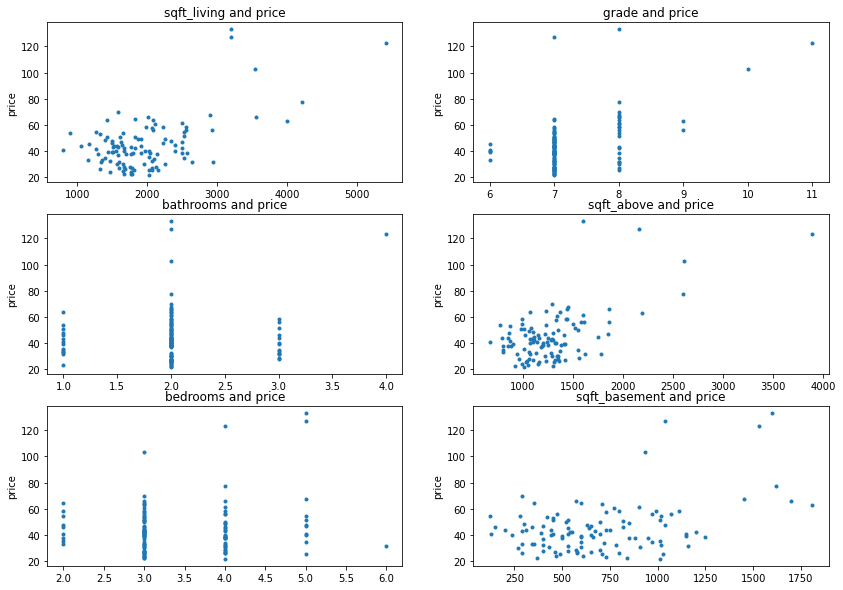

In [27]:
fig, axs = plt.subplots(3, 2,figsize=(14,10))
axs[0, 0].plot(df2["sqft_living"],df2["price"],'.');
axs[0, 0].set_title("sqft_living and price")
axs[0, 1].plot(df2["grade"],df2["price"],'.');
axs[0, 1].set_title("grade and price")
axs[2, 0].plot(df2["bedrooms"],df2["price"],'.');
axs[2, 0].set_title('bedrooms and price')
axs[1, 0].plot(df2["bathrooms"],df2["price"],'.');
axs[1, 0].set_title('bathrooms and price')
axs[1, 1].plot(df2["sqft_above"],df2["price"],'.');
axs[1, 1].set_title('sqft_above and price')
axs[2, 1].plot(df2["sqft_basement"],df2["price"],'.');
axs[2, 1].set_title('sqft_basement and price')

for ax in axs.flat:
    ax.set( ylabel='price')


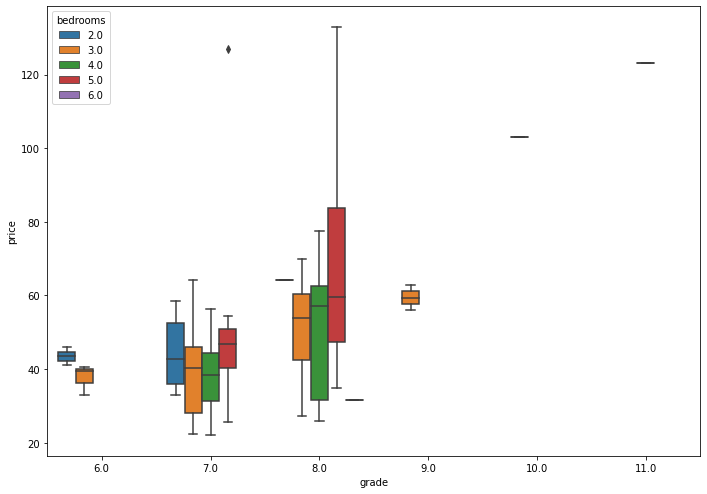

In [28]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x="grade", y="price", hue='bedrooms', data=df2);

In [29]:
rule1 = ctrl.Rule(sqft_living["Small"] | sqft_above['Small'] | sqft_basement["poor"] | bathrooms['average'], price['cheap'])
rule2 = ctrl.Rule(bedrooms["many"] & grade['high'] , price['expensive'])
rule3 = ctrl.Rule(sqft_above['Large'], price['expensive'])

### 3. Aggregations of the rule outputs <a id='st3'></a>

In [30]:
house_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3])
house = ctrl.ControlSystemSimulation(control_system=house_ctrl, clip_to_bounds=True)

In [31]:
house.input['sqft_living']=df2['sqft_living'][2]
house.input['grade']=df2['grade'][2]
house.input['bedrooms']=df2['bedrooms'][2]
house.input['sqft_above']=df2['sqft_above'][2]
house.input['sqft_basement']=df2['sqft_basement'][2]
house.input['bathrooms']=df2['bathrooms'][2]

### 4. Defuzzification <a id='st4'></a>

44.36215053763435
66.25


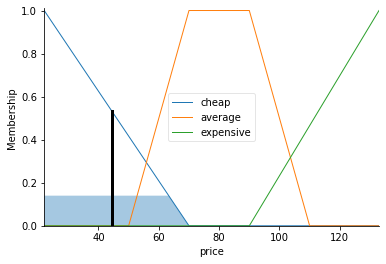

In [32]:
house.compute()
print(house.output['price'])
print(df2['price'][2])
price.view(sim=house)